Aims of this months project:
1. Learn basics of python
2. EDA
3. Solve using atleast one method
4. Submit a solution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [95]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [3]:
train = pd.read_csv("../May/train.csv") 
test = pd.read_csv("../May/test.csv")
print(train.shape, test.shape)

(100000, 52) (50000, 51)


In [111]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [5]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-null  int64
 19  feature_18  50000 non-null  int64
 20  feature_19  50000 non-null  

In [8]:
print("There are",len(pd.unique(train.target)),"classes in the target column in train.csv")

There are 4 classes in the target column in train.csv


In [9]:
## Count of id in each class
train.groupby(['target'])['id'].count()

target
Class_1     8490
Class_2    57497
Class_3    21420
Class_4    12593
Name: id, dtype: int64

Create a Naive Bayes model without doing any feature engineering. This will sereve as a baseline index for the performance of future improvements.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['id','target'], axis = 1), train['target'], test_size=0.3,random_state=109) # 70% training and 30% test

In [5]:
X_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
40514,2,0,0,0,0,0,0,5,2,0,...,0,1,0,1,0,0,0,0,0,0
39697,0,1,0,0,0,0,1,4,0,1,...,8,0,1,0,0,0,0,0,3,0
33954,0,1,0,0,0,0,0,1,15,0,...,0,0,1,5,0,0,0,0,0,0
14833,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,8
59219,0,0,0,0,2,0,0,0,2,0,...,0,0,0,0,0,0,5,0,1,0


In [6]:
y_train.head()

40514    Class_2
39697    Class_2
33954    Class_3
14833    Class_2
59219    Class_1
Name: target, dtype: object

In [87]:
#Create log-probability estimates for the test vector X
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict_proba(X_test)

In [88]:
print("log loss:",log_loss(y_test, y_pred))

log loss: 2.4691702612623203


In [ ]:
test.drop(['id'], axis = 1)

In [60]:
final_pred = gnb.predict_proba(test.drop(['id'], axis = 1))

In [61]:
print(final_pred)

[[0.11923548 0.51844803 0.19195769 0.1703588 ]
 [0.08564247 0.25268179 0.10926414 0.5524116 ]
 [0.00582139 0.88378797 0.00599241 0.10439822]
 ...
 [0.00589615 0.76077241 0.1196218  0.11370965]
 [0.00713628 0.20837834 0.00761787 0.7768675 ]
 [0.07116824 0.72189447 0.06510044 0.14183684]]


In [64]:
df = pd.DataFrame(final_pred, columns = ['Class_1','Class_2','Class_3','Class_4'])

In [65]:
df.head()

,Class_1,Class_2,Class_3,Class_4
0,0.119235,0.518448,0.191958,0.170359
1,0.085642,0.252682,0.109264,0.552412
2,0.005821,0.883788,0.005992,0.104398
3,0.002869,0.000045,0.996658,0.000427
4,0.007443,0.195170,0.010506,0.786881


In [73]:
id = test['id']
my_submission = pd.concat([id, df], names=['id', 'Class_1','Class_2','Class_3','Class_4'])
##my_submission.to_csv('submission.csv', index=False)

In [77]:
my_submission.to_csv('submission.csv', index = False)

Now that we have submitted one solution, the next step is to increase our performance. The current solutions does worse than randomly picking the class. 
1. Understand how GNB predcitions work
2. Understand how log_loss is calcualted
3. Learn feature engineering
4. Try other modeling techniques too

In [120]:
rf = RandomForestClassifier(oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)

In [117]:
print("log loss:",log_loss(y_test, y_pred))

log loss: 1.1339542399239766


In [96]:
rf_pred = rf.predict_proba(test.drop(['id'], axis = 1))
print(rf_pred)

[[0.11 0.43 0.31 0.15]
 [0.07 0.6  0.17 0.16]
 [0.1  0.6  0.22 0.08]
 ...
 [0.04 0.51 0.24 0.21]
 [0.09 0.58 0.1  0.23]
 [0.11 0.47 0.27 0.15]]


In [97]:
rf_pred = pd.DataFrame(rf_pred, columns = ['Class_1','Class_2','Class_3','Class_4'])

In [98]:
test_id = test['id']
my_submission = pd.concat([test_id, rf_pred], names=['id', 'Class_1','Class_2','Class_3','Class_4'])

In [99]:
my_submission.to_csv('submission_rf_202105051340.csv', index = False)

Simply using random forest instead of GNB brought down the log loss from 2.409 to 1.12251; 
Why is random forest performing so much better than GNB here?
Is it always the same?

Trying other modeling techniques:

In [114]:
## logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
print("log loss:",log_loss(y_test, y_pred) )

log loss: 1.1116519191416832


In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
scores = cross_val_score(lr, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.576 +/- 0.001


In [106]:
lr_pred = lr.predict_proba(test.drop(['id'], axis = 1))
print(rf_pred)

       Class_1  Class_2  Class_3  Class_4
0         0.11     0.43     0.31     0.15
1         0.07     0.60     0.17     0.16
2         0.10     0.60     0.22     0.08
3         0.11     0.46     0.25     0.18
4         0.03     0.67     0.21     0.09
...        ...      ...      ...      ...
49995     0.14     0.56     0.18     0.12
49996     0.10     0.67     0.11     0.12
49997     0.04     0.51     0.24     0.21
49998     0.09     0.58     0.10     0.23
49999     0.11     0.47     0.27     0.15

[50000 rows x 4 columns]


In [107]:
lr_pred = pd.DataFrame(lr_pred, columns = ['Class_1','Class_2','Class_3','Class_4'])
test_id = test['id']
my_submission = pd.concat([test_id, lr_pred], names=['id', 'Class_1','Class_2','Class_3','Class_4'])
my_submission.to_csv('submission_lr_202105051441.csv', index = False)

In [96]:
## Improving Random Forest

## Create a validation set and add bootstraping & oob_score

## train, val, test set will be 60%, 20%, 20% of the dataset respectively.

X = train.drop(['id', 'target'], axis = 1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_val.shape)
print (y_val.shape)


(60000, 50)
(60000,)
(20000, 50)
(20000,)
(20000, 50)
(20000,)


In [97]:

rf = RandomForestClassifier(oob_score = True,
                          bootstrap = True,
                          random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [169]:
y_test_pred = rf.predict_proba(X_test)
y_val_pred = rf.predict_proba(X_val)

In [177]:
X_index = pd.DataFrame(X_test.index, columns = ['id'])

In [178]:
y_test_pred = pd.DataFrame(y_test_pred, columns = ['Class_1','Class_2','Class_3','Class_4'])
loss_func_test = pd.concat([X_index, y_test_pred], names=['id', 'Class_1','Class_2','Class_3','Class_4'])
loss_func_test.to_csv('loss_func_test.csv', index = False)

In [99]:
print("oob score:",- rf.oob_score_, "\n",
      "test score:", rf.score(X_test, y_test), "\n",
      "val score:", rf.score(X_val, y_val), "\n",
      "test log loss:", log_loss(y_test, y_test_pred), "\n",
      "val log loss:", log_loss(y_val, y_val_pred)
     )



oob score: -0.5712666666666667 
 test score: 0.5741 
 val score: 0.5755 
 test log loss: 1.1299678108415288 
 val log loss: 1.131408449315742


In [102]:
y_test_pred = rf.predict(X_test)
y_val_pred = rf.predict(X_val)

In [170]:
y_test_pred

array([[0.04, 0.61, 0.19, 0.16],
       [0.13, 0.53, 0.26, 0.08],
       [0.11, 0.56, 0.18, 0.15],
       ...,
       [0.05, 0.76, 0.06, 0.13],
       [0.13, 0.54, 0.23, 0.1 ],
       [0.1 , 0.37, 0.3 , 0.23]])

In [105]:
confusion_matrix(y_test, y_test_pred)
#rf.score(X_test, y_test)

array([[    0,  1645,    31,     0],
       [    1, 11320,   120,     3],
       [    0,  4180,   160,     1],
       [    0,  2494,    43,     2]], dtype=int64)

In [171]:
y_test_pred = pd.Series(y_test_pred)

Exception: Data must be 1-dimensional

In [163]:
print(y_test_pred.value_counts())

Class_2    19639
Class_3      354
Class_4        6
Class_1        1
dtype: int64


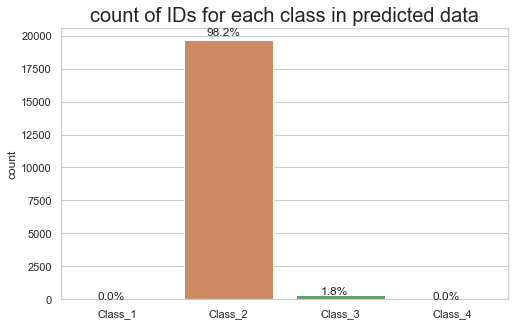

In [166]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(y_test_pred))
ax = sns.countplot(y_test_pred, order=['Class_1', 'Class_2', 'Class_3', 'Class_4'])
plt.title('count of IDs for each class in predicted data', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + p.get_height()*0.02
    ax.annotate(percentage, (x, y), ha ='center')
plt.show()

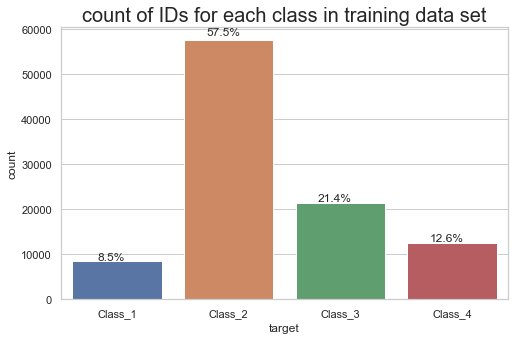

In [153]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train))
ax = sns.countplot(x="target", data=train, order=['Class_1', 'Class_2', 'Class_3', 'Class_4'])
plt.title('count of IDs for each class in training data set', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + p.get_height()*0.02
    ax.annotate(percentage, (x, y), ha ='center')
plt.show()


In [149]:
importance = rf.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

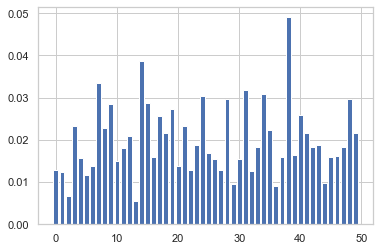

In [152]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature Engineering:
0. EDA - 
1. Check for correaltions
2. Multi-colineratity
3. Feature Importance
4. Account for input bias towards Class_2

In [ ]:
df = train

In [21]:
df.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,49999.500000,0.257830,0.431720,0.114130,0.590550,0.599770,0.160820,0.731490,1.228920,0.903350,...,0.712270,0.582070,0.529230,0.616310,0.135100,0.358660,0.516810,0.39004,0.970850,0.55712
std,28867.657797,0.929033,1.977862,0.519584,1.844558,2.785531,0.601149,2.343465,2.692732,3.415258,...,1.721863,2.003114,2.300826,2.360955,0.627592,1.464187,2.171415,1.48735,2.576615,1.68093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,24999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,49999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,74999.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000
max,99999.000000,10.000000,31.000000,6.000000,26.000000,38.000000,10.000000,27.000000,31.000000,39.000000,...,21.000000,32.000000,37.000000,33.000000,9.000000,26.000000,29.000000,25.00000,44.000000,20.00000


In [94]:
df.nunique().sort_values()

target_Class_4         2
target_Class_2         2
target_Class_1         2
target_Class_3         2
feature_36             4
feature_13             4
feature_22             5
feature_2              7
feature_44            10
feature_0             11
feature_5             11
feature_12            12
feature_11            13
feature_18            14
feature_29            14
feature_37            15
feature_17            17
feature_10            17
feature_9             18
feature_20            18
feature_16            20
feature_23            20
feature_15            21
feature_49            21
feature_40            22
feature_26            22
feature_25            23
feature_28            24
feature_33            25
feature_47            26
feature_34            26
feature_3             26
feature_45            27
feature_6             28
feature_32            30
feature_46            30
feature_1             31
feature_41            31
feature_7             32
feature_27            32


In [114]:
counts = train.groupby(['target'])['id'].count()
counts.head()

target
Class_1     8490
Class_2    57497
Class_3    21420
Class_4    12593
Name: id, dtype: int64

In [138]:
## There is skew towards towards class 2
for p in ax.patches:
    print('{:.1f}%'.format(p.get_x()))

-0.4%
0.6%
1.6%
2.6%


In [51]:
df.iloc[:,40:52]

,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,6,0,0,3,0,0,0,Class_1
99996,0,0,0,2,0,0,0,10,0,0,0,Class_2
99997,0,0,0,0,0,0,1,0,0,2,0,Class_3
99998,0,0,0,0,0,0,0,1,0,4,0,Class_2


In [70]:
df = pd.get_dummies(df)

In [71]:
df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target_Class_1,target_Class_2,target_Class_3,target_Class_4
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,13,2,0,1,0,0,0
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [75]:
#correlation matrix
corrmat = df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.3, square=True);

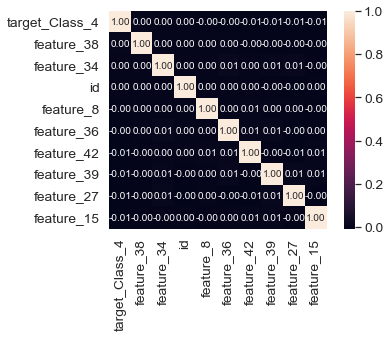

In [83]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target_Class_4')['target_Class_4'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1]:
plt.figure(figsize=(16,16),dpi=80)
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
## Get feature importance